## Importing Libraries

In [4]:
# import libraries
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

# Loading and Visualizing Data

In [18]:
train_batchsize = 100
test_batchsize = 100
resized_img_size = 28
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size=(resized_img_size, resized_img_size)),
                               torchvision.transforms.ToTensor()
                             ])
train_data = torchvision.datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform) 
test_data = torchvision.datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=train_batchsize,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=test_batchsize,
                                         shuffle=True)

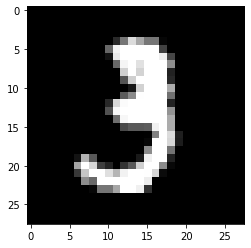

In [19]:
plt.imshow(train_data[10][0][0],cmap='gray')

# Model
In case of binary classification we can use sigmoid however in other cases we use Softmax to classify we don't need to mention it as it's internally calculated in forward step.

In [22]:
import torch.nn as nn
import torch.nn.functional as F 
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.layer = nn.Linear(28*28,10)
    def forward(self,X):
        X = X.view(-1,784)
        # Softmax is internally calculated in forward operation so we need not specify anything here.
        return self.layer(X)

# Training With different Optimizers

In [23]:
from ADAM import ADAM
trainingLoss = {}
# Fixed seed for random weight initialization (to keep the weights same for all
# the models)
seed = 11 
#torch.manual_seed(3)
def trainDifOptimizer(optmzr):
    torch.manual_seed(seed)
    model = LogisticRegression()
    criterion = nn.CrossEntropyLoss()
    optimizer = None
    if optmzr=='Adam_scratch':
      optimizer = ADAM(model.parameters(), lr=0.01) # lr=0.001 -> standard
    else:
      optimizer = getattr(torch.optim, optmzr)(model.parameters(), lr=0.01)
    
    n_epochs = 15  # suggest training between 20-50 epochs

    model.train()  # prep model for training
    trainLossForOptimizer = []
    print("Optimizer : ", optmzr, "\n")
    for epoch in range(n_epochs):
        train_loss = 0.0

        for data, target in train_loader:
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update running training loss
            train_loss += loss.item()*data.size(0)

        # print training statistics
        # calculate average loss over an epoch
        train_loss = train_loss/len(train_loader.dataset)
        trainLossForOptimizer.append(train_loss)
        
        print('Epoch: {} \tTraining Loss: {:.6f}'.format(
            epoch+1,
            train_loss
        ))
    torch.save(model, 'saved_models/'+optmzr+'_LogisticRegression_model')
    trainingLoss[optmzr] = trainLossForOptimizer
    print("\n-----------------------------------------\n")

optimizersLst = ['Adam', 'RMSprop','SGD','Adadelta','Adam_scratch']

for optmzr in optimizersLst:
    trainDifOptimizer(optmzr)
print(trainingLoss)

Optimizer :  Adam 

Epoch: 1 	Training Loss: 0.357643
Epoch: 2 	Training Loss: 0.295494
Epoch: 3 	Training Loss: 0.288338
Epoch: 4 	Training Loss: 0.281534
Epoch: 5 	Training Loss: 0.279618
Epoch: 6 	Training Loss: 0.279377
Epoch: 7 	Training Loss: 0.277775
Epoch: 8 	Training Loss: 0.272130
Epoch: 9 	Training Loss: 0.271093
Epoch: 10 	Training Loss: 0.271797
Epoch: 11 	Training Loss: 0.270385
Epoch: 12 	Training Loss: 0.267989
Epoch: 13 	Training Loss: 0.266686
Epoch: 14 	Training Loss: 0.267186
Epoch: 15 	Training Loss: 0.267923

-----------------------------------------

Optimizer :  RMSprop 

Epoch: 1 	Training Loss: 0.373928
Epoch: 2 	Training Loss: 0.309281
Epoch: 3 	Training Loss: 0.300725
Epoch: 4 	Training Loss: 0.294331
Epoch: 5 	Training Loss: 0.290620
Epoch: 6 	Training Loss: 0.288367
Epoch: 7 	Training Loss: 0.286667
Epoch: 8 	Training Loss: 0.285883
Epoch: 9 	Training Loss: 0.284490
Epoch: 10 	Training Loss: 0.282227
Epoch: 11 	Training Loss: 0.284973
Epoch: 12 	Training L

# Graph

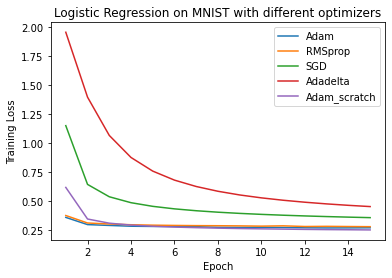

In [25]:
import numpy as np
import matplotlib.pyplot as plt
Xval = np.arange(1, 16,1)

plt.xlabel("Epoch")  # add X-axis label
plt.ylabel("Training Loss")  # add Y-axis label
plt.title("Logistic Regression on MNIST with different optimizers")  # add title
for key, value in trainingLoss.items():
    plt.plot(Xval, value, label=key)

plt.legend()
plt.show()